# Weekly Assignment 05

Author: Galal Abdelaziz

File Name: assignment_5_risk.ipynb

Task: Create a jupyter notebook called assignment_5_risk the program will simulate 1000 battle rounds in Risk (3 attackers vs. 2 defenders) and plot the outcomes. Each battle round consists of one roll of the dice for both the attacker and the defender.


## Risk Battle Simulation

This code simulates a series of battles between attackers and defenders, similar to the mechanics of the board game Risk. The simulation rolls dice for both sides, compares the results, and calculates losses based on the outcomes of the rolls.

![Risk](img/risk.jpg)

***

### Import Libraries

In [75]:
import numpy as np
import matplotlib.pyplot as plt

### Function Definitions

The following functions are defined to handle the dice rolling, battle simulation, and result plotting.

In [76]:
# Define the roll_dice function
def roll_dice(num_dice):
    """Roll a specified number of 6-sided dice."""
    return np.random.randint(1, 7, num_dice)

In [77]:
# Define the battle_round function
def battle_round(attacker_troops, defender_troops):
    """Simulate a single battle round between attackers and defenders."""
    attacker_rolls = np.sort(roll_dice(min(3, attacker_troops)))[::-1]
    defender_rolls = np.sort(roll_dice(min(2, defender_troops)))[::-1]

    attacker_losses = 0
    defender_losses = 0

    # Compare the highest dice
    if attacker_rolls.size > 0 and defender_rolls.size > 0:
        if attacker_rolls[0] <= defender_rolls[0]:
            attacker_losses += 1
        else:
            defender_losses += 1

    # Compare the second highest dice
    if attacker_rolls.size > 1 and defender_rolls.size > 1:
        if attacker_rolls[1] <= defender_rolls[1]:
            attacker_losses += 1
        else:
            defender_losses += 1

    return attacker_losses, defender_losses

In [78]:
#  Define the simulate_battles function for a fixed number of battles
def simulate_fixed_battles(num_battles, attacker_troops=3, defender_troops=2):
    """Simulate a series of battles and return the total losses."""
    total_attacker_losses = 0
    total_defender_losses = 0

    for _ in range(num_battles):
        attacker_losses, defender_losses = battle_round(attacker_troops, defender_troops)
        total_attacker_losses += attacker_losses
        total_defender_losses += defender_losses

    return total_attacker_losses, total_defender_losses

In [79]:
#  Define the plot_results function
def plot_results(attacker_losses, defender_losses, title):
    """Plot the results of the battles."""
    labels = ['Attacker Losses', 'Defender Losses']
    losses = [attacker_losses, defender_losses]

    plt.bar(labels, losses, color=['blue', 'red'])
    plt.ylabel('Number of Troops Lost')
    plt.title(title)
    plt.show()

### Run the Simulation
In this section, we will run the simulation for a specified number of battles (1000) and plot the results.

Total Attacker Losses: 928
Total Defender Losses: 1072


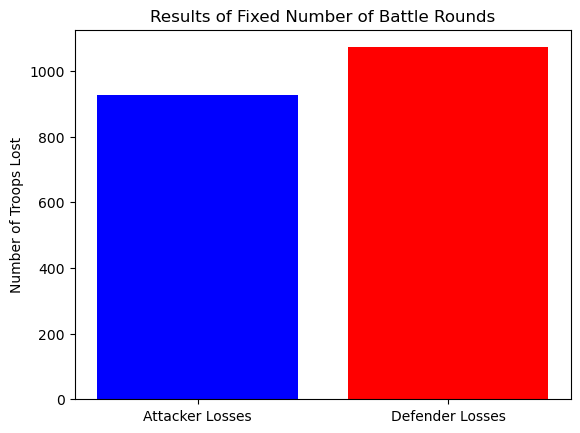

In [80]:
# Run the fixed battles simulation
num_battles = 1000
attacker_losses, defender_losses = simulate_fixed_battles(num_battles)
print(f"Total Attacker Losses: {attacker_losses}")
print(f"Total Defender Losses: {defender_losses}")
plot_results(attacker_losses, defender_losses, 'Results of Fixed Number of Battle Rounds')

### Extra
The following functions are defined to handle the battle simulation until one side is wiped out.

#### First Simulation

In this section, we will run the simulation until wiped out (starting with 40 infantry each following risk two player's rules) and plot the results.

Total Rounds: 34
Total Attacker Losses: 27
Total Defender Losses: 40


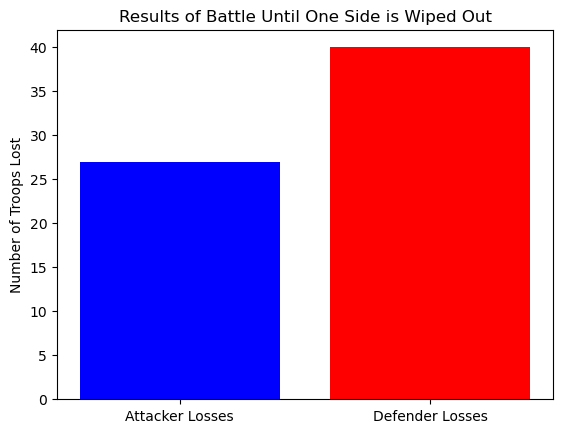

In [81]:
# Define the simulate_battles function for until one side is wiped out
def simulate_until_wiped_out(initial_attacker_troops, initial_defender_troops):
    """Simulate battles until one side is wiped out."""
    attacker_troops = initial_attacker_troops
    defender_troops = initial_defender_troops

    rounds = 0
    attacker_losses_history = []
    defender_losses_history = []

    while attacker_troops > 0 and defender_troops > 0:
        rounds += 1
        attacker_losses, defender_losses = battle_round(attacker_troops, defender_troops)
        attacker_troops -= attacker_losses
        defender_troops -= defender_losses

        attacker_losses_history.append(attacker_losses)
        defender_losses_history.append(defender_losses)

    return rounds, initial_attacker_troops - attacker_troops, initial_defender_troops - defender_troops

# Run the until wiped out simulation
initial_attacker_troops = 40
initial_defender_troops = 40
rounds, attacker_losses, defender_losses = simulate_until_wiped_out(initial_attacker_troops, initial_defender_troops)

print(f"Total Rounds: {rounds}")
print(f"Total Attacker Losses: {attacker_losses}")
print(f"Total Defender Losses: {defender_losses}")

# Plot the results
plot_results(attacker_losses, defender_losses, 'Results of Battle Until One Side is Wiped Out')

#### Second Simulation

In this section, we will run the simulation until wiped out (starting with 40 infantry each following risk two player's rules), We will print the dice rolls and results for each round and plot the final results.

Round 1: Attacker Roll: [6 5 3], Defender Roll: [5 5], Attacker Losses: 1, Defender Losses: 1
Round 2: Attacker Roll: [2 2 2], Defender Roll: [6 3], Attacker Losses: 2, Defender Losses: 0
Round 3: Attacker Roll: [4 4 2], Defender Roll: [4 4], Attacker Losses: 2, Defender Losses: 0
Round 4: Attacker Roll: [5 1 1], Defender Roll: [5 1], Attacker Losses: 2, Defender Losses: 0
Round 5: Attacker Roll: [5 5 1], Defender Roll: [6 1], Attacker Losses: 1, Defender Losses: 1
Round 6: Attacker Roll: [6 2 1], Defender Roll: [6 2], Attacker Losses: 2, Defender Losses: 0
Round 7: Attacker Roll: [4 3 1], Defender Roll: [5 4], Attacker Losses: 2, Defender Losses: 0
Round 8: Attacker Roll: [6 4 3], Defender Roll: [2 1], Attacker Losses: 0, Defender Losses: 2
Round 9: Attacker Roll: [6 5 5], Defender Roll: [3 2], Attacker Losses: 0, Defender Losses: 2
Round 10: Attacker Roll: [2 1 1], Defender Roll: [6 6], Attacker Losses: 2, Defender Losses: 0
Round 11: Attacker Roll: [2 2 1], Defender Roll: [6 6], Att

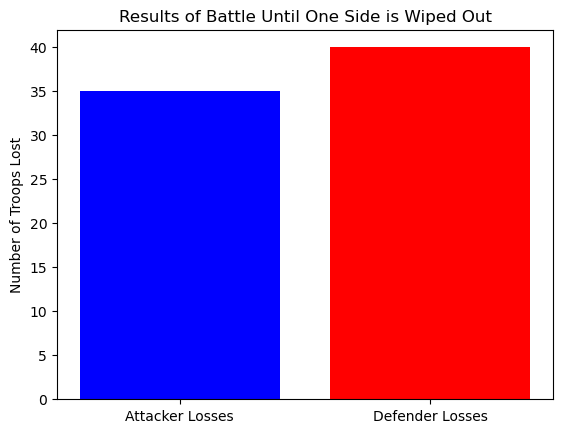

In [82]:

# Define the battle_round function
def battle_round(attacker_troops, defender_troops):
    """Simulate a single battle round between attackers and defenders."""
    attacker_rolls = np.sort(roll_dice(min(3, attacker_troops)))[::-1]
    defender_rolls = np.sort(roll_dice(min(2, defender_troops)))[::-1]

    attacker_losses = 0
    defender_losses = 0

    # Compare the highest dice
    if attacker_rolls.size > 0 and defender_rolls.size > 0:
        if attacker_rolls[0] <= defender_rolls[0]:
            attacker_losses += 1
        else:
            defender_losses += 1

    # Compare the second highest dice
    if attacker_rolls.size > 1 and defender_rolls.size > 1:
        if attacker_rolls[1] <= defender_rolls[1]:
            attacker_losses += 1
        else:
            defender_losses += 1

    return attacker_losses, defender_losses, attacker_rolls, defender_rolls

# Define the simulate_until_wiped_out function
def simulate_until_wiped_out(initial_attacker_troops, initial_defender_troops):
    """Simulate battles until one side is wiped out."""
    attacker_troops = initial_attacker_troops
    defender_troops = initial_defender_troops

    rounds = 0
    attacker_losses_history = []
    defender_losses_history = []

    while attacker_troops > 0 and defender_troops > 0:
        rounds += 1
        attacker_losses, defender_losses, attacker_rolls, defender_rolls = battle_round(attacker_troops, defender_troops)
        attacker_troops -= attacker_losses
        defender_troops -= defender_losses

        attacker_losses_history.append(attacker_losses)
        defender_losses_history.append(defender_losses)

        # Print each round's result with dice rolls
        print(f"Round {rounds}: Attacker Roll: {attacker_rolls}, Defender Roll: {defender_rolls}, Attacker Losses: {attacker_losses}, Defender Losses: {defender_losses}")

    return rounds, initial_attacker_troops - attacker_troops, initial_defender_troops - defender_troops

# Run the until wiped out simulation
initial_attacker_troops = 40
initial_defender_troops = 40
rounds, attacker_losses, defender_losses = simulate_until_wiped_out(initial_attacker_troops, initial_defender_troops)

print(f"Total Rounds: {rounds}")
print(f"Total Attacker Losses: {attacker_losses}")
print(f"Total Defender Losses: {defender_losses}")

# Plot the results
plot_results(attacker_losses, defender_losses, 'Results of Battle Until One Side is Wiped Out')


**Note:** Due to the complexity of the code for this task, I have divided it into sections and added extra comments to simplify and clarify each part.

***

## End.